In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from combinators.inference import importance, mcmc
from combinators.kernel import kernel, mh
from combinators import utils

In [3]:
import examples.ais.ais_1d_gaussians as ais_example

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
target = ais_example.AnnealingTarget(annealing_steps=200, batch_shape=(100,))

In [6]:
ais = ais_example.annealed_importance(target, kernel.GaussianKernel('AnnealingTarget', 'X_0', scale=1.0), moves=200)

In [7]:
annealed_points, trace, log_weight = ais()
log_probs = utils.normalize_weights(log_weight)

In [8]:
import matplotlib.pyplot as plt
from torch.distributions import Normal

In [9]:
sample = torch.linspace(-10, 10, 100)
sample_probs = Normal(loc=torch.zeros(1), scale=torch.ones(1)).log_prob(sample).exp()

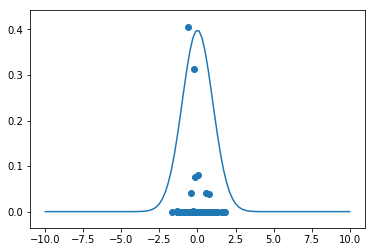

In [10]:
plt.scatter(annealed_points.detach().numpy(), log_probs.exp())
plt.plot(sample.detach().numpy(), sample_probs.detach().numpy())

In [11]:
annealed_points

tensor([ 0.1218, -0.0117,  1.0107,  0.0193,  0.4206,  1.2726, -0.1402, -0.1954,
         1.0248,  0.1748,  1.0248,  0.9662, -0.6947,  0.5763,  0.7719, -0.6947,
         0.8448,  1.6049, -0.1954, -0.4484,  0.6367,  0.1218, -0.5932, -0.2364,
        -1.1272,  0.5763, -0.5750, -0.6947,  0.9662, -0.1954,  1.2726, -0.4444,
         0.0193,  0.1060, -0.6947,  0.9662, -0.2625,  1.8406,  0.3705, -0.8397,
         0.6219,  0.5685,  0.1617, -1.6750,  0.1503, -0.2842, -0.6947, -0.4041,
        -0.7491,  0.6367,  0.1541,  1.0248, -0.4701, -0.2252, -0.2625, -0.1954,
         1.6049, -0.2003, -1.2929,  0.0537,  0.8954,  0.8448,  1.6049, -0.4484,
        -0.4484, -0.9774, -0.6482, -1.3466,  0.8448, -0.2003, -1.1272,  0.0193,
         0.0994, -0.6482,  0.3859, -0.5758,  0.7427,  1.1511,  0.9600,  0.8448,
         0.0994, -1.2717, -0.0117,  0.2127,  0.6367, -1.3466,  1.7507,  0.0537,
        -0.0117, -0.1402, -0.1815, -0.4444,  0.8735, -0.5932,  0.1503,  0.1338,
        -0.6482, -0.8397, -0.2003,  0.37

In [12]:
log_probs.exp()

tensor([4.7002e-05, 1.9044e-10, 1.0434e-17, 1.8880e-09, 2.0929e-08, 6.6902e-12,
        3.1377e-08, 1.6640e-07, 1.3564e-07, 6.2283e-11, 1.6524e-15, 3.4282e-10,
        1.1773e-06, 4.1373e-02, 3.9613e-02, 2.0977e-12, 1.9839e-13, 3.8621e-13,
        2.0687e-11, 5.9083e-17, 4.2754e-14, 1.5401e-13, 4.0646e-01, 1.1446e-07,
        4.7886e-14, 1.9883e-06, 3.0830e-09, 3.9150e-14, 2.6451e-05, 7.6359e-02,
        8.0841e-14, 6.0891e-16, 8.0626e-02, 1.8417e-06, 1.1069e-14, 3.2350e-15,
        6.3229e-21, 9.2244e-16, 3.0937e-13, 3.0704e-13, 1.3688e-11, 1.4256e-15,
        6.4941e-15, 2.3803e-13, 1.0597e-08, 1.5656e-18, 1.4600e-07, 9.1422e-12,
        4.3360e-11, 2.4999e-12, 1.0320e-13, 8.1188e-05, 6.7203e-15, 8.4078e-20,
        6.7768e-04, 2.5305e-15, 6.0742e-14, 3.9774e-06, 2.2760e-10, 1.5176e-05,
        1.1744e-06, 2.9109e-09, 2.5908e-07, 5.1998e-17, 4.0073e-02, 5.4896e-15,
        3.8949e-16, 2.1569e-11, 8.2108e-18, 3.1419e-01, 7.5277e-13, 1.3505e-16,
        2.8434e-18, 6.4630e-12, 2.8952e-